# 1. Recursion

<div style="border:3px red solid; padding: 0px 20px 10px;">
    <h2 style="color:red">Exercise 1</h2>
    <ul>
        <li style="color:red">In the documentation <b>Slides_en/Trees</b> you will find a recursive definition of the mathematical factorial function.</li>
        <li style="color:red">Write a function to calculate the factorial. Use this to calculate the factorial of 11.</li>
    </ul>
</div>


In [12]:
# Exercise 1: your code here

# 2. Tree structures

## Traversing

[Saake und Sattler, Kapitel 14.2.2]

[Sedgewick and Wayne, Section 3.2]

Denotes traversing the tree. Several strategies can be used for this.

The most important strategies are referred to as **Inorder**, **Preorder**, **Postorder** and **Levelorder**.

- **Inorder:** The left subtree is run through recursively first, then the node itself and then the right subtree.
- **Preorder:** The node itself is processed first, then the left or right subtree.
- **Postorder:** The two subtrees are run through first, followed by the node itself.
- **Level order:** Each level is run through before going deeper to the next level.

<div style="border:3px red solid; padding: 0px 20px 10px;">
    <h2 style="color:red">Exercise 2</h2>
    <ul>
        <li style="color:red">The following tree contains information.</li>
        <li style="color:red">Which traversing strategy makes the information contained legible?</li>
    </ul>
</div>

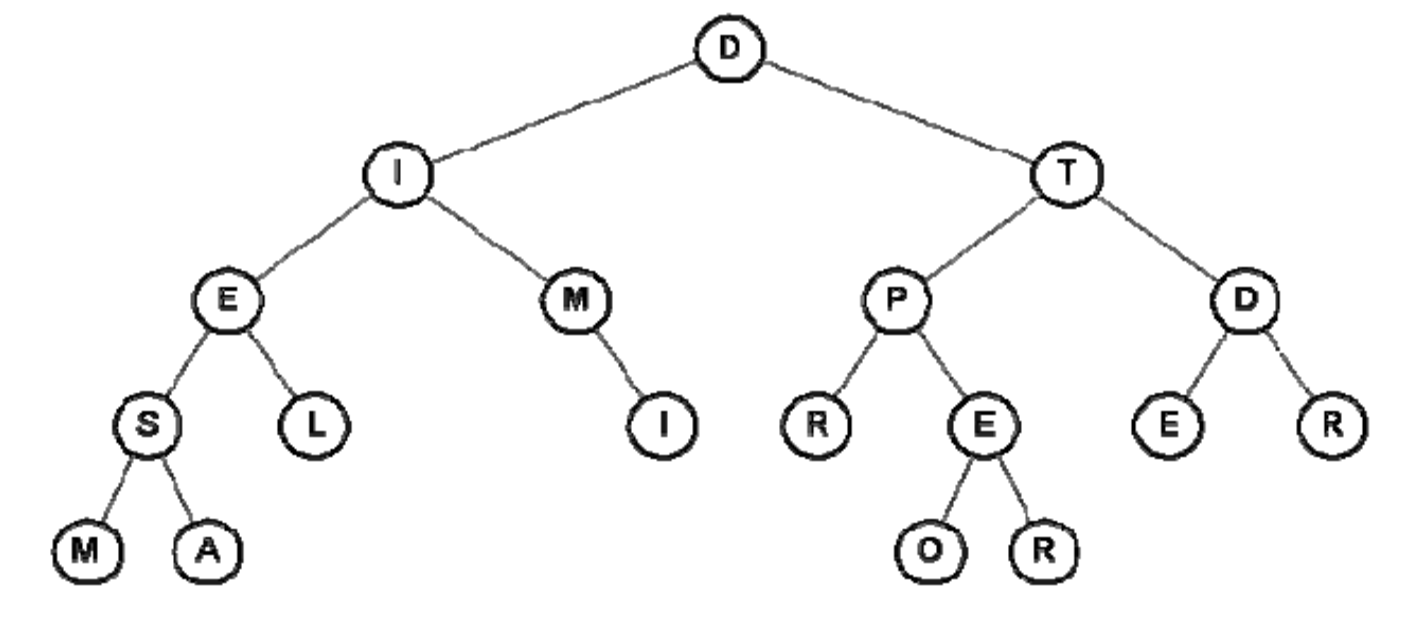

## Search Trees

[Saake und Sattler, Kapitel 14.3]

[Sedgewick and Wayne, Section 3.2]

One of the most important areas of application of the tree structure is its use for an efficient search. For this purpose, the individual nodes are kept in a sorted order.

The functions **Insert**, **Search** and **Delete** are relevant for search trees.

At this point we will implement the required classes and functions and then explain them.

In [15]:
# Class Node only contains a value and placeholder for additional nodes
# Most of the code will be provided via the Tree class

class Node(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

#### Insert

[Saake und Sattler, Kapitel 14.3.2]

[Sedgewick and Wayne, Section 3.2. p. 400]

For the "Insert" operation, the correct insertion position must first be found so that the order of the elements is not violated. This position must be a node with a key value greater than that of the element to be inserted and which does not yet have a left child, or a node with a smaller key value and an empty space for the right child.

There are two cases to be distinguished:
* The tree is empty, i.e. the node to be inserted becomes the new root.
* There are already nodes in the tree. In this case we need to find/search the node that should become the parent node of the new element.

In the following example tree, the value 4 is inserted into the already existing tree.

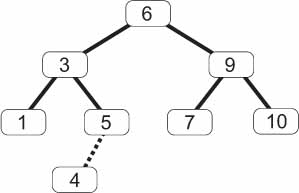

Our implementation gets a method `add_node`, which inserts a new node at the correct place. 

```python
    def add_node(self, node, value): # Add function
        if (self.root != None):
            if (node.value == value):
                print ("Can't add same value twice!")
                return False
            elif (value < node.value):
                if (node.left == None):
                    node.left = Node(value)
                else:
                    self.add_node(node.left, value)
            else:
                if (node.right == None):
                    node.right = Node(value)
                else:
                    self.add_node(node.right, value)
        else:
            self.root = Node(value)
        return True
```

#### Search
[Saake und Sattler, Kapitel 14.3.1]

[Sedgewick and Wayne, Section 3.2. p. 397]

The search function is very simple. Here, 3 cases are checked.
- The value sought is equal to the passed node (initially: root).
- The value sought is smaller than the passed node and the passed node has a left successor.
- The value sought is greater than the passed node and the passed node has a right successor

In the first case, the searched value was found.
In cases 2 and 3, the function must be called again. > Node is now a different node than originally!

If the value is not found, ```False``` is passed as the return value.

``` Python

    def search(self, node, value): # Search function
        # Returns the node that contains the value or False if the tree doesn't contain the value
        if (node.value == value):
            return node
        elif (value < node.value and node.left != None):
            return self.search(node.left, value)
        elif (value > node.value and node.right != None):
            return self.search(node.right, value)
        return False
```

#### Depth

In some cases it may be necessary to ask for depth.
- Here, the function simply traverses each path of the structure and increments a counter for each node found in that path. 
- Finally, the longest path is passed +1. 
    - The +1 is necessary because the root node has not yet been counted.
    
``` Python
    def depth(self, node):
        if (node == None):
            return 0
        else:
            leftDepth = self.depth(node.left)
            rightDepth = self.depth(node.right)

            if (leftDepth > rightDepth):
                return leftDepth + 1
            else:
                return rightDepth + 1
```

#### Delete
[Saake und Sattler, Kapitel 14.3.2]

[Sedgewick and Wayne, Section 3.2. p. 410]

The operation "Delete" is probably the most extensive function of a search tree.
The procedure can be divided into 4 cases:
- The passed node is None 
- The passed value is smaller than the passed node.
- The passed value is greater than the passed node.
- The transferred value is equal to the transferred node.

Case 1 leads to an immediate end of the function.
Cases 2 and 3 lead to a renewed (recursive) call of the function with other parameters.
Case 4 is the actual deletion and the associated restructuring.
Here it is only necessary to check whether the left or right successor is None.

Note: an additional function ``minValueNode`` is used. This function searches for the smallest successor of the passed node.

The implementation of the functions is as follows:

``` Python
    def minValueNode(self, node):
        current = node
        while (current.left is not None):
            current = current.left
        return current

    def delete_node(self, node, value): 
        if(node is None):
            return node
        if (value < node.value):
            node.left = self.delete_node(node.left, value)
        elif (value > node.value):
            node.right = self.delete_node(node.right, value)
        else:
            if (node.left is None):
                temp = node.right
                node = None
                return temp
            elif (node.right is None):
                temp = node.left
                node = None
                return temp
            temp = self.minValueNode(node.right)
            node.value = temp.value
            node.right = self.delete_node(node.right, temp.value)
        return node
```

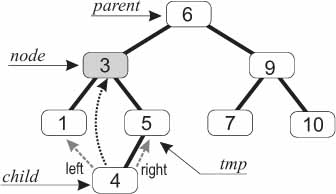

Now let's put all the methods together in the following class `Tree`:

In [16]:
# Class Tree contains a root node and the functions
# It uses the class node

class Tree:
    def __init__(self):
        self.root = None

    def add_node(self, node, value): # Add function
        if (self.root != None):
            if (node.value == value):
                print ("Can't add same value twice!")
                return False
            elif (value < node.value):
                if (node.left == None):
                    node.left = Node(value)
                else:
                    self.add_node(node.left, value)
            else:
                if (node.right == None):
                    node.right = Node(value)
                else:
                    self.add_node(node.right, value)
        else:
            self.root = Node(value)
        return True


    def search(self, node, value): # Search function
        # Returns the node that contains the value or False if the tree doesn't contain the value
        if (node.value == value):
            return node
        elif (value < node.value and node.left != None):
            return self.search(node.left, value)
        elif (value > node.value and node.right != None):
            return self.search(node.right, value)
        return False

    def depth(self, node):
        if (node == None):
            return 0
        else:
            leftDepth = self.depth(node.left)
            rightDepth = self.depth(node.right)

            if (leftDepth > rightDepth):
                return leftDepth + 1
            else:
                return rightDepth + 1

    def minValueNode(self, node):
        current = node
        while (current.left is not None):
            current = current.left
        return current
            
    def delete_node(self, node, value):
        if(node is None):
            return node
        if (value < node.value):
            node.left = self.delete_node(node.left, value)
        elif (value > node.value):
            node.right = self.delete_node(node.right, value)
        else:
            if (node.left is None):
                temp = node.right
                node = None
                return temp
            elif (node.right is None):
                temp = node.left
                node = None
                return temp
            temp = self.minValueNode(node.right)
            node.value = temp.value
            node.right = self.delete_node(node.right, temp.value)
        return node
            
    def printInorder(self, node): # Inorder traversing as explained above
        if (node != None):
            self.printInorder(node.left)
            print(node.value)
            self.printInorder(node.right)

    def printPreorder(self, node): # Preorder traversing as explained above
        if (node != None):
            print(node.value)
            self.printPreorder(node.left)
            self.printPreorder(node.right)

    def printPostorder(self, node): # Postorder traversing as explained above
        if (node != None):
            self.printPostorder(node.left)
            self.printPostorder(node.right)
            print(node.value)

For execution, some test values are first inserted into the tree with **add_node**.

In [25]:
binaryTree = Tree()

# test values, add function
binaryTree.add_node(binaryTree.root, 6) # root is always the startpoint here
binaryTree.add_node(binaryTree.root, 3)
binaryTree.add_node(binaryTree.root, 1)
binaryTree.add_node(binaryTree.root, 5)
binaryTree.add_node(binaryTree.root, 7)
binaryTree.add_node(binaryTree.root, 10)
binaryTree.add_node(binaryTree.root, 9)

True

Searching for the value 6 will return the Node, but searching for the value 20 will return false.

In [18]:
searchedNode = binaryTree.search(binaryTree.root, 6)
print(searchedNode.value) # prints the node that contains 6

6


In [19]:
searchedNode = binaryTree.search(binaryTree.root, 20)
print(searchedNode) # prints False -> 20 is not in the tree

False


In [20]:
print("The depth of the tree is: ",binaryTree.depth(binaryTree.root))

('The depth of the tree is: ', 4)


In [21]:
binaryTree.printInorder(binaryTree.root)

1
3
5
6
7
9
10


In [22]:
binaryTree.printPreorder(binaryTree.root)

6
3
1
5
7
10
9


In [23]:
binaryTree.printPostorder(binaryTree.root)

1
5
3
9
10
7
6


In [24]:
root = binaryTree.delete_node(binaryTree.root, 6) # Now we'll delete value 6
binaryTree.printInorder(binaryTree.root)

1
3
5
7
9
10


<div style="border:3px red solid; padding: 0px 20px 10px;">
    <h2 style="color:red">Exercise 3</h2>
    <li style="color:red">The implementation given above already contains in-order, pre-or, and post-order output.</li>
    <li style="color:red">Extend the tree with a level-order output, i.e. with the <code>printLevelorder</code> function.</li>
</div>

## Complexity of operations

The search effort is low, since only the path from the root to the corresponding node is run through. The effort is solely determined by the height of the tree.

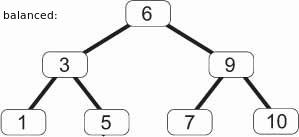

Looking at the tree shown above, one can see that for the search for 1, the right half and the root element can already be excluded after the first run of the search function.

Therefore, the search is very efficient for balanced trees.

Problems can occur if a degenerate tree is created by inserting increasing values.

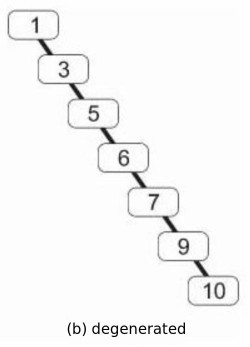

If the number 10 were to be searched for, the entire tree would have to be run through.

### Balanced Trees

To prevent a degenerate tree, one can try to balance the tree after each insert and delete operation.